In [308]:
import plotly.graph_objects as go
import kaleido
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image

CSV_PATH = './csv-files/'
IMAGE_PATH = './images/'

pd.set_option('display.max_columns', None)

# Bar Assignment

## Visualisation of CSV file

In [309]:
bar_df = pd.read_csv(CSV_PATH + "bar_assignment.csv", sep = ",")
bar_df.head(bar_df.size)

,LABEL,COUNT
0,D,1
1,D,1
2,D,0
3,D,1
4,F,1
5,F,1
6,F,0
7,F,0
8,I,1
9,N,1


## Graph

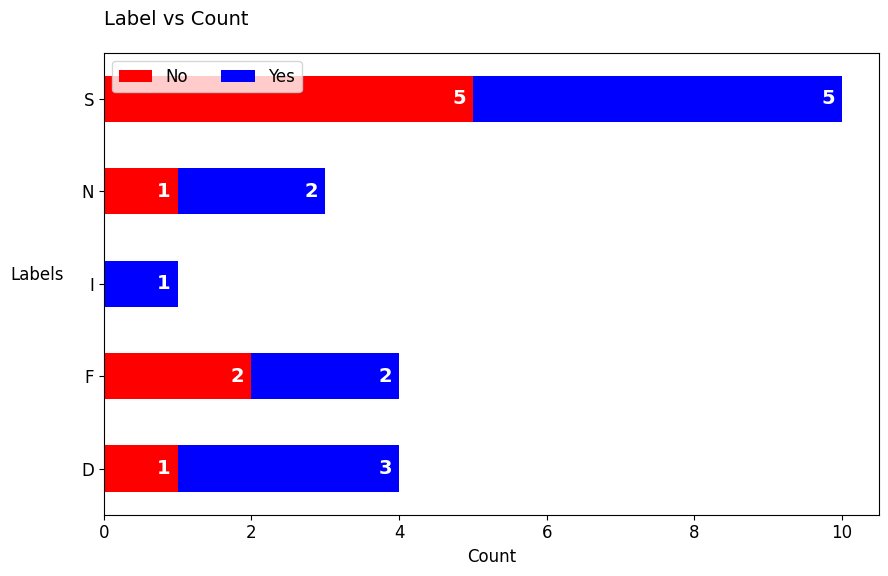

In [310]:
bar_df["COUNT"] = bar_df["COUNT"].map({1: "Yes", 0: "No"})
bar_pivot = bar_df.pivot_table(index="LABEL", columns="COUNT", aggfunc="size", fill_value=0)

fig, ax = plt.subplots(figsize=(10, 6))
bars = bar_pivot.plot(kind="barh", stacked=True, ax=ax, color=['red', 'blue'])
    
for container in ax.containers:
    labels = [int(val) if val > 0 else "" for val in container.datavalues]  # Remove zero labels
    ax.bar_label(container, labels=labels, color='white', padding=-15, fontsize=14, fontweight='bold')

            
# Title and labels
plt.title("Label vs Count", loc='left', fontsize=14, pad=20)
plt.ylabel('Labels', rotation=0, labelpad=32)
plt.xlabel('Count')

# Legend
plt.legend(loc='upper left', ncols=2)

# Save and show
bar_chart_path = IMAGE_PATH + "bar_graph.png"
plt.savefig(bar_chart_path, bbox_inches="tight")
plt.show()


# Sankey Assignment

## Visualization of CSV File

In [311]:
csv_file = "./csv-files/sankey_assignment.csv"

df = pd.read_csv(csv_file)

df.head(df.size)

,LABEL,PS,OMP,CNP,NRP,NMCCC,PEC,NCDM,RGS,Reg,Aca,Oth
0,S,3,4,1,1,0,0,1,1,2,7,1
1,F,0,1,2,1,1,0,0,1,2,2,0
2,D,1,1,2,0,0,0,1,1,1,3,1
3,N,1,1,1,1,0,1,1,0,2,2,1
4,I,0,1,0,0,0,0,0,0,0,1,0


## Graph

# Network Assignment

## Visualization of CSV File

In [312]:
network_df = pd.read_csv(CSV_PATH + "networks_assignment.csv")
network_df.head(network_df.size)

,LABELS,N,D,F,I,S,AUT,BEL,BIH,BGR,HRV,CZE,EST,FRA,GEO,DEU,GRC,HUN,IRL,ISR,ITA,LVA,LUX,MNE,NLD,PRT,ROU,SRB,SVK,SVN,ESP,CHE,TUR,UKR,GBR,AUS,HKG,ASU
0,D,3,0,3,1,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,1
1,F,1,2,0,1,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,0,2,1,1,0,1,1,2,1,0,0,2,0,0,0
2,I,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,0,2,2,1,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,2,1,0,1
4,S,5,4,3,3,0,2,2,2,2,2,2,2,2,2,3,2,2,2,2,2,0,2,2,4,2,2,2,0,0,2,2,2,2,3,1,1,1


## Graph

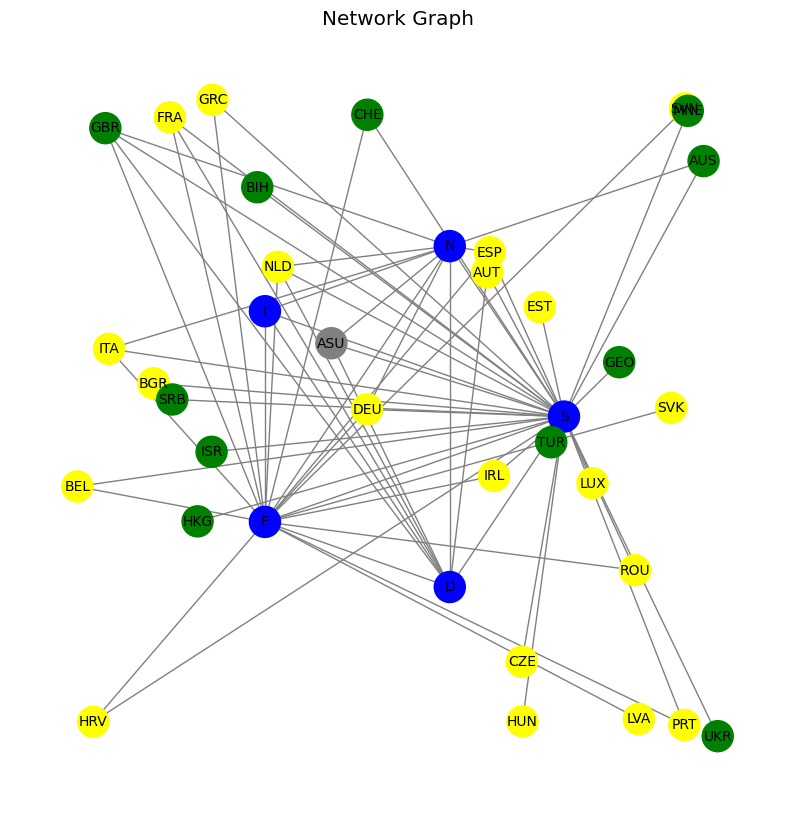

In [313]:
# Step 2: Define Core Nodes and Color Groups
blue_nodes = {"D", "F", "I", "N", "S"}
green_nodes = {"BIH", "GEO", "ISR", "MNE", "SRB", "CHE", "TUR", "UKR", "GBR", "AUS", "HKG", "USA"}
yellow_nodes = {"AUT", "BEL", "BGR", "HRV", "CZE", "EST", "FRA", "DEU", "GRC", "HUN", "IRL", "ITA", "LVA", "LUX", "NLD", "PRT", "ROU", "SVK", "SVN", "ESP"}

# Step 3: Create Graph Object
G = nx.Graph()

# Step 4: Add Edges from CSV Data
for index, row in network_df.iterrows():
    node = row["LABELS"]
    for target, value in row.items():
        if target != "LABELS" and value > 0:  # Ignore self-loops and zero weights
            G.add_edge(node, target, weight=value)

# Step 5: Define Node Positions
pos = {}
angle_step = 2 * np.pi / 5
radius = 1

# Pentagram Nodes (Structured Placement)
for i, node in enumerate(pentagram_nodes):
    angle = i * angle_step
    pos[node] = (radius * np.cos(angle), radius * np.sin(angle))

# Other Nodes (Random Placement)
other_nodes = set(G.nodes) - pentagram_nodes
for node in other_nodes:
    pos[node] = (np.random.uniform(-2, 2), np.random.uniform(-2, 2))

# Step 6: Define Node Colors
node_colors = []
for node in G.nodes:
    if node in blue_nodes:
        node_colors.append("blue")
    elif node in green_nodes:
        node_colors.append("green")
    elif node in yellow_nodes:
        node_colors.append("yellow")
    else:
        node_colors.append("gray")

# Step 7: Create Network Plot
fig, ax = plt.subplots(figsize=(10, 10))
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=500, font_size=10)
ax.set_title("Network Graph")

# Step 8: Save & Display Plot
network_chart_path = "network_graph.png"  # Adjust path if needed
plt.savefig(network_chart_path, bbox_inches="tight")
plt.show()
